In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import parse_biclust,read_true_bics,read_all_results
from find_optimal_parameters import  plot_F1_heatmap,get_opt_params, F1_per_bic

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "ChengChurch"
tool_suffix = "ChengChurch"
n_runs = 1

parameters = (("alpha",[1,1.1,1.2,1.3,1.4,1.5]),
              ("delta",[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/F1/img"
tsv_outdir = out_dir + "/F1/"

In [5]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 60
	files not found: 380
	files empty: 0
	failed to parse: 0
Total runs 1200
Non-zero runs: 365


In [6]:
parameters

(('alpha', [1, 1.1, 1.2, 1.3, 1.4, 1.5]),
 ('delta', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

Total combinations: 60
Total combinations: 60
Combinations with mean F1 > 0.01 8


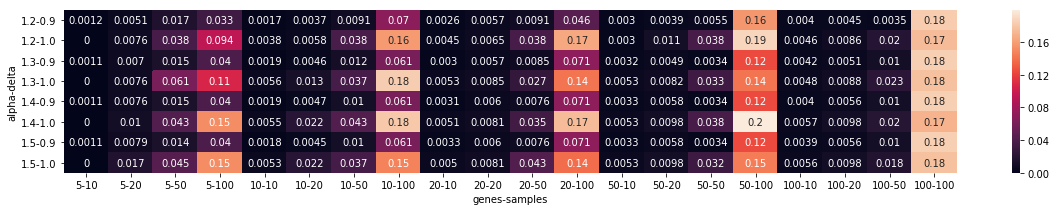

In [7]:
params = ["alpha","delta"]
plot_file = img_outdir+"/" + tool_suffix+".F1_heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".F1_heatmap.tsv"

heatmap = plot_F1_heatmap(results,params,f1_thr=0.01,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [8]:
parameters

(('alpha', [1, 1.1, 1.2, 1.3, 1.4, 1.5]),
 ('delta', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

In [9]:
default_params = (1.5,1.0)

In [11]:

r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 1200 runs considered

Optimal parameters (max. avg. F1 per bicluster):
	alpha=1.4;
	delta=1.0;
	Max. avg. F1 per bicluster:0.057±0.072
	avg. F1 per best match:0.056±0.086
	biclusters per run:4.8±2.4
With default parameters:
	alpha=1.5;
	delta=1.0;
	avg. F1 per bicluster:0.051±0.062
	avg. F1 per best match:0.05±0.081
	biclusters per run:4.8±2.3


F1 per bicluster                                      \
                        mean       std count       max       min   
alpha delta                                                        
1.4   1.0           0.056890  0.071988    20  0.199698  0.000000   
1.5   1.0           0.051179  0.061619    20  0.177462  0.000000   
1.2   1.0           0.050402  0.066210    20  0.188170  0.000000   
1.3   1.0           0.050032  0.062799    20  0.183722  0.000000   
1.4   0.9           0.028561  0.048366    20  0.184489  0.001079   
1.3   0.9           0.028561  0.048375    20  0.184489  0.001079   
1.5   0.9           0.028557  0.048365    20  0.184489  0.001079   
1.2   0.9           0.028374  0.051656    20  0.182734  0.001158   
      0.8           0.004270  0.015751    20  0.071120  0.000000   
1.4   0.8           0.003768  0.013575    20  0.061358  0.000000   
1.5   0.8           0.003768  0.013575    20  0.061358  0.000000   
1.3   0.8           0.003761  0.013576    20  0.061358  0.000000   
1.2   0.7           0.000378  0.000543    20  0.001748  0.000000   
1.3   0.7           0.000365  0.000565    20  0.001819  0.000000   
1.4   0.7           0.000338  0.000501    20  0.001347  0.000000   
1.5   0.7           0.000338  0.000501    20  0.001347  0.000000   
1.2   0.6           0.000295  0.000550    20  0.001987  0.000000   
1.3   0.6           0.000280  0.000464    20  0.001348  0.000000   
1.5   0.6           0.000277  0.000458    20  0.001348  0.000000   
1.4   0.6           0.000277  0.000458    20  0.001348  0.000000   
1.2   0.5           0.000259  0.000473    20  0.001611  0.000000   
1.4   0.5           0.000246  0.000411    20  0.001181  0.000000   
1.5   0.5           0.000246  0.000411    20  0.001181  0.000000   
1.3   0.5           0.000235  0.000403    20  0.001181  0.000000   
1.4   0.4           0.000164  0.000302    20  0.000987  0.000000   
1.5   0.4           0.000164  0.000302    20  0.000987  0.000000   
1.3   0.4           0.000157  0.000300    20  0.000987  0.000000   
1.2   0.4           0.000154  0.000301    20  0.000987  0.000000   
1.0   0.9           0.000114  0.000509    20  0.002278  0.000000   
1.2   0.3           0.000099  0.000200    20  0.000571  0.000000   
1.3   0.3           0.000094  0.000196    20  0.000571  0.000000   
1.5   0.3           0.000090  0.000197    20  0.000571  0.000000   
1.4   0.3           0.000090  0.000197    20  0.000571  0.000000   
1.2   0.2           0.000063  0.000195    20  0.000644  0.000000   
1.3   0.2           0.000060  0.000172    20  0.000621  0.000000   
1.1   0.9           0.000057  0.000254    20  0.001135  0.000000   
1.4   0.2           0.000055  0.000172    20  0.000621  0.000000   
1.5   0.2           0.000055  0.000172    20  0.000621  0.000000   
1.0   0.8           0.000035  0.000158    20  0.000705  0.000000   
1.1   0.8           0.000033  0.000146    20  0.000653  0.000000   
1.0   0.7           0.000019  0.000083    20  0.000371  0.000000   
1.1   0.7           0.000018  0.000080    20  0.000360  0.000000   
      0.5           0.000016  0.000072    20  0.000320  0.000000   
      0.3           0.000016  0.000071    20  0.000319  0.000000   
1.0   0.6           0.000014  0.000063    20  0.000281  0.000000   
1.1   0.6           0.000009  0.000042    20  0.000187  0.000000   
1.2   0.1           0.000009  0.000041    20  0.000183  0.000000   
1.5   0.1           0.000000  0.000000    20  0.000000  0.000000   
1.0   0.1           0.000000  0.000000    20  0.000000  0.000000   
1.4   0.1           0.000000  0.000000    20  0.000000  0.000000   
1.0   0.2           0.000000  0.000000    20  0.000000  0.000000   
1.1   1.0           0.000000  0.000000    20  0.000000  0.000000   
      0.4           0.000000  0.000000    20  0.000000  0.000000   
      0.2           0.000000  0.000000    20  0.000000  0.000000   
      0.1           0.000000  0.000000    20  0.000000  0.000000   
1.0   1.0           0.000000  0.000000    20  0.000000  0.000000   
